Firstly we have loaded the data from hugging face by the following code , as it was not getting right when we were directly downloading it , this is much better way 
and for this "pip install datasets" is must"

In [1]:
from datasets import load_dataset

# Load the emotion dataset
dataset = load_dataset("dair-ai/emotion")

# View the first example in the training set
print(dataset['train'][0])

import pandas as pd

# Convert the training set to a pandas DataFrame
df = pd.DataFrame(dataset['train'])
val_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

# Save to CSV
df.to_csv("emotion_dataset_train.csv", index=False)
val_df.to_csv("emotion_validation.csv", index=False)
test_df.to_csv("emotion_test.csv", index=False)


label_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}


{'text': 'i didnt feel humiliated', 'label': 0}


In [2]:
# mapping numbers to proper labels (creating a column named as emotion and in that all the labels will be mapped to reakl emotion
df['emotion'] = df['label'].map(label_mapping)
val_df['emotion'] = df['label'].map(label_mapping)
test_df['emotion'] = df['label'].map(label_mapping)

print(df.head(10))
print(val_df.head(2))
print(test_df.head(2))

                                                text  label   emotion
0                            i didnt feel humiliated      0   sadness
1  i can go from feeling so hopeless to so damned...      0   sadness
2   im grabbing a minute to post i feel greedy wrong      3     anger
3  i am ever feeling nostalgic about the fireplac...      2      love
4                               i am feeling grouchy      3     anger
5  ive been feeling a little burdened lately wasn...      0   sadness
6  ive been taking or milligrams or times recomme...      5  surprise
7  i feel as confused about life as a teenager or...      4      fear
8  i have been with petronas for years i feel tha...      1       joy
9                                i feel romantic too      2      love
                                                text  label  emotion
0  im feeling quite sad and sorry for myself but ...      0  sadness
1  i feel like i am still looking at a blank canv...      0  sadness
                       

Why Do We Use TF-IDF and Logistic Regression?
1. 🔠 Text to Numbers: TF-IDF Vectorizer
❓ Why convert text to numbers?
Computers and ML algorithms can’t read language, they only understand numbers.

So we convert each sentence into a vector (a list of numbers) using TF-IDF.

💡 What is TF-IDF?
TF-IDF = Term Frequency - Inverse Document Frequency

It’s a way to measure how important a word is in a sentence, compared to how common it is in all sentences.

For example:

In “I love my life”, “love” might be important.

But common words like “I” or “the” might be ignored.

So, TF-IDF helps focus on emotion-rich words, and that’s why it’s commonly used in text classification.

2. 🤖 Train the Model: Logistic Regression
❓ Why Logistic Regression?
It’s one of the simplest and most effective models for classification tasks (like predicting emotions).

Easy to understand, fast to train, and gives a good baseline performance.

It's not actually for "regression" here — it’s a bit of a naming confusion. In text tasks, it’s used for multi-class classification.

In [3]:
# use text as input and lebel as output
x_train = df['text']
y_train = df['label']

x_val = df['text']
y_val = df['label']

In [4]:
# converting text to numbers
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
x_train_tfidf = tfidf.fit_transform(x_train)
x_val_tfidf = tfidf.transform(x_val)

We are **creating a machine** (called `tfidf`) that will convert text into numbers using **TF-IDF**.  
We also tell it: "Just keep the **top 5000 most useful words** only."

---

python
X_train_tfidf = tfidf.fit_transform(X_train)
fit_transform = learn + convert.

Now we take our **validation text data** (`X_val`) and just **convert** it into numbers using what was learned before.
We **don't learn again** here, just **transform**.


In [5]:
#  Step 4: Train the Logistic Regression Mode
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

We are importing a **ready-made brain** (model) called **Logistic Regression** from the scikit-learn library.

This brain is good at **classification tasks**, like:
- Is this email spam or not?
- Is this review positive or negative?

hat is max_iter=1000 in LogisticRegression?
It stands for maximum number of iterations — or how many times the algorithm is allowed to try to find the best solution.

⚙️ What happens when we train a model?
When the model trains, it keeps adjusting itself to make better and better guesses (like a student trying different ways to answer a question).

It does this in loops, called iterations.
On each iteration, it updates its internal numbers (called weights) to reduce error.
This is done using a method like gradient descent — where it tries to reach the best point step by step.

 What is Gradient Descent?
Gradient Descent is a smart method used by machine learning models to learn the best solution by trying again and again and getting better each time.

You can think of it like this:

🧗‍♂️ Imagine this:
You are standing on a hill 🏔️, blindfolded.
Your goal is to reach the lowest point in the valley (the best answer ✅).

You can't see, but you can feel the slope under your feet.
So you take small steps in the direction that feels downhill.
Eventually, you reach the bottom!

That’s exactly what Gradient Descent does.

🔍 What’s really happening?
In machine learning:
The hill = A big graph showing how wrong your model is (called loss or error).
The lowest point = The place where your model makes the least error.
The slope = Tells you which direction to step to get less error.
Gradient = Fancy word for "slope".
Descent = Means "going downward" toward the minimum error.

In [6]:
# step5: evaluating the model
from sklearn.metrics import accuracy_score, classification_report

# predicting on Validation data
y_pred = model.predict(x_val_tfidf)

# checking accuracy 
print("Validation Accuracy: " , accuracy_score(y_val, y_pred)) 

# classification Report
print(classification_report(y_val,y_pred, target_names= df['emotion'].unique()))

Validation Accuracy:  0.9315
              precision    recall  f1-score   support

     sadness       0.94      0.97      0.96      4666
       anger       0.91      0.98      0.94      5362
        love       0.95      0.79      0.86      1304
    surprise       0.95      0.90      0.93      2159
        fear       0.93      0.89      0.91      1937
         joy       0.95      0.70      0.81       572

    accuracy                           0.93     16000
   macro avg       0.94      0.87      0.90     16000
weighted avg       0.93      0.93      0.93     16000



In [7]:
# Test the Model on the Test Data
test_Pred = model.predict(tfidf.transform(test_df['text']))

# checking accuracy 
print("Accuracy: " , accuracy_score(test_df['label'], test_Pred)) 

# classification Report
print(classification_report(test_df['label'],test_Pred, target_names= df['emotion'].unique()))

Accuracy:  0.869
              precision    recall  f1-score   support

     sadness       0.90      0.93      0.92       581
       anger       0.84      0.96      0.89       695
        love       0.83      0.60      0.69       159
    surprise       0.90      0.82      0.86       275
        fear       0.89      0.80      0.84       224
         joy       0.85      0.52      0.64        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



now the thing is that the accuracy on validation dataset is coming about93%, but it only gets upto 86%for testing data: this is the case of overfitting. 
but fortunately, we have a solution **"use of hyperparamaters tuning"** , which in the case of python and logistic regression is **c** and we will also do cross validation and then **GridSearchCV**

 What is **GridSearchCV?**
GridSearchCV = **Try all combinations of hyperparameter values and pick the best one.**
It does this by splitting data into training and validation parts (CV = cross-validation).
It helps avoid overfitting and gives more reliable results.

Imagine This:

You are a student and you have to learn from a book (your training data), and then give an exam (your test data).

If you only memorize the book word by word, you might not do well in the exam. Why? Because the exam will have new questions. You need to understand the book, not just memorize it.
That’s what overfitting means — learning too much from training, but failing in real life.

Now Think of a Helper:

**Regularization** is like a teacher who tells you:

> "Don’t just memorize everything! Learn the main ideas. Keep it simple."

So, regularization helps the model stay simple and not become too clever.

What is Regularization Strength?
Regularization strength is how strict the teacher is:

If the teacher is very strict (high regularization), you can only learn the most important things. The model becomes simple, maybe too simple.
If the teacher is not strict at all (low regularization), you might memorize everything, and overfit.

In the Computer:

We use a number called C (in Python):
Big C = Not much regularization (you can memorize more).
Small C = Lots of regularization (you can memorize less, keep it simple).

So when we tune hyperparameters, we are choosing how strict our teacher should be to help our model learn just right — not too much, not too little.

In [8]:
# Regularized logistic regression model
model = LogisticRegression(C=0.1, max_iter=1000)  #A smaller value of C (say, 0.1 or 0.01) increases regularization, which can prevent the model from overfitting.
model.fit(x_train_tfidf, y_train)


LogisticRegression(C=0.1, max_iter=1000)

In [9]:
# cross validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(LogisticRegression(C=0.1, max_iter=1000), x_train_tfidf,y_train,cv=5)
print("Cross-Validation scores: ", cv_scores)
print("Mean Cross-Validation scores: ", cv_scores.mean())

Cross-Validation scores:  [0.6071875 0.60625   0.606875  0.5990625 0.599375 ]
Mean Cross-Validation scores:  0.60375


Should You Do GridSearchCV After This?
Yes, and here’s why:

✅ Why Use GridSearchCV?
Your current cross-validation manually sets one value of C = 0.1.

But what if:
Another value of C (like 0.01, 1, or 10) performs better?
You want to automatically find the best hyperparameter instead of trying each manually?

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create a parameter grid to test different regularization strengths
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000]
}

# Initialize model
log_reg = LogisticRegression()

# Grid Search with 5-fold CV
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train_tfidf, y_train)

# Best score and parameters
print("Best CV Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)


Best CV Score: 0.8771875
Best Parameters: {'C': 10, 'max_iter': 1000}


In [11]:
#  Use the Best Model for Final Predictions
best_model = grid.best_estimator_

In [12]:
#  Evaluate the model on test data
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_test_pred = best_model.predict(tfidf.transform(test_df['text']))

print("Test Accuracy:", accuracy_score(test_df['label'], y_test_pred))
print("Classification Report:\n", classification_report(test_df['label'], y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(test_df['label'], y_test_pred))


Test Accuracy: 0.8765
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       581
           1       0.88      0.93      0.91       695
           2       0.76      0.72      0.74       159
           3       0.88      0.85      0.86       275
           4       0.87      0.82      0.84       224
           5       0.73      0.62      0.67        66

    accuracy                           0.88      2000
   macro avg       0.84      0.81      0.82      2000
weighted avg       0.87      0.88      0.88      2000

Confusion Matrix:
 [[536  19   2  16   7   1]
 [  7 645  32   3   3   5]
 [  2  39 114   4   0   0]
 [ 24  10   1 234   6   0]
 [ 17   6   1   8 183   9]
 [  2  10   0   2  11  41]]


In [13]:
# using other models such as randomforest and support vector classifier to compare all these and to get the best one
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# training the randomforest
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train_tfidf,y_train)

# predicting it 
y_pred_rf = rf_model.predict(tfidf.transform(test_df['text']))

# Accuracy 
print("Random Forest Accuracy:", accuracy_score(test_df['label'],y_pred_rf))


# training the SVC
svm_model =SVC(kernel='linear')    #linear kernel is good for text data
svm_model.fit(x_train_tfidf,y_train)

# predicting it
y_pred_svm = svm_model.predict(tfidf.transform(test_df['text']))

# accuracy
print("SVC Accuracy:", accuracy_score(test_df['label'],y_pred_svm))


Random Forest Accuracy: 0.875
SVC Accuracy: 0.887


Classification Report:

              precision    recall  f1-score   support

     sadness       0.93      0.92      0.93       581
         joy       0.88      0.95      0.91       695
        love       0.82      0.69      0.75       159
       anger       0.89      0.88      0.88       275
        fear       0.85      0.86      0.86       224
    surprise       0.74      0.56      0.64        66

    accuracy                           0.89      2000
   macro avg       0.85      0.81      0.83      2000
weighted avg       0.89      0.89      0.88      2000



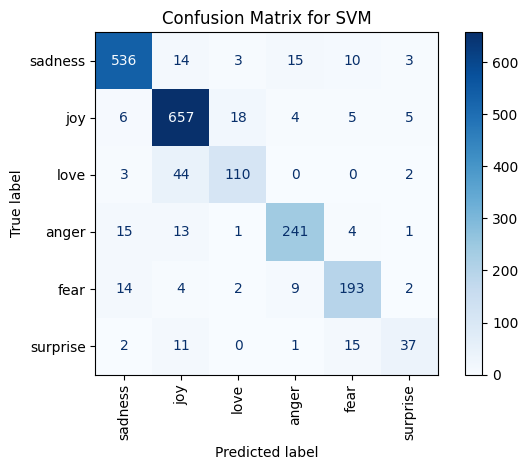

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Print classification report
print("Classification Report:\n")
print(classification_report(test_df['label'], y_pred_svm, target_names=label_mapping.values()))

# 2. Plot confusion matrix
cm = confusion_matrix(test_df['label'], y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping.values())
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix for SVM")
plt.tight_layout()
plt.show()


C:\Users\Gurnoor\AppData\Local\Temp\ipykernel_43904\1107067820.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pred_counts.keys()),y=list(pred_counts.values()),palette="coolwarm")


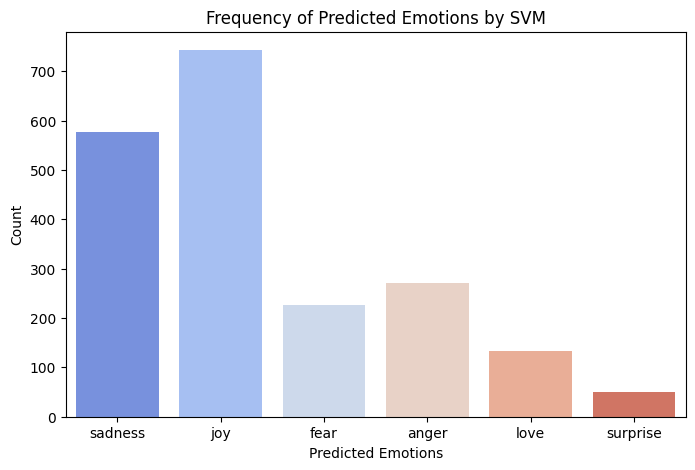

In [15]:
# visualizations 

import seaborn as sns
from collections import Counter

y_pred_labels = [label_mapping[pred] for pred in y_pred_svm]
# Convert numeric predictions to emotion names (if you haven't already done so)

pred_counts = Counter(y_pred_labels)   # Counts how many times each emotion was predicted
plt.figure(figsize=(8,5))  
sns.barplot(x=list(pred_counts.keys()),y=list(pred_counts.values()),palette="coolwarm")
plt.title("Frequency of Predicted Emotions by SVM")
plt.xlabel("Predicted Emotions")
plt.ylabel("Count")
plt.show()

In [16]:
# to look for missclassified texts 
import pandas as pd

x_test = tfidf.transform(test_df['text'])  
y_test= test_df['label']

df_results = pd.DataFrame(
    {
        'Text': test_df['text'], # The text that was tested
        'Actual': y_test,    # The actual emotion for each text
        'predicted': y_pred_svm     # The emotion predicted by the model
    }
)

missclassified = df_results[df_results['Actual'] != df_results['predicted']]   # Filters the misclassified texts
print(missclassified.sample(10))  # Shows 5 random misclassified examples



                                                   Text  Actual  predicted
550   i feel convinced that im going to shy away fro...       1          4
353   i could feel his breath on me and smell the sw...       1          2
1320  i feel like a greedy pig catching up to do lt ...       3          1
1026  i have not conducted a survey but it is quite ...       0          4
1729  i felt like id developed feelings for this guy...       1          2
1655                       i feel so helpless right now       4          0
1642  i cant write a review for a book i adore unles...       2          1
97    i lay in bed feeling as though i were awaiting...       0          1
1273             i feel this strange sort of liberation       5          4
877   i feel respected and secure where i can journe...       1          2


Word Cloud for Each Emotion
What’s Happening?
A word cloud shows you which words are most common for each emotion. Words that appear more often will appear larger in the word cloud. This is great for seeing which words help the model predict certain emotions.

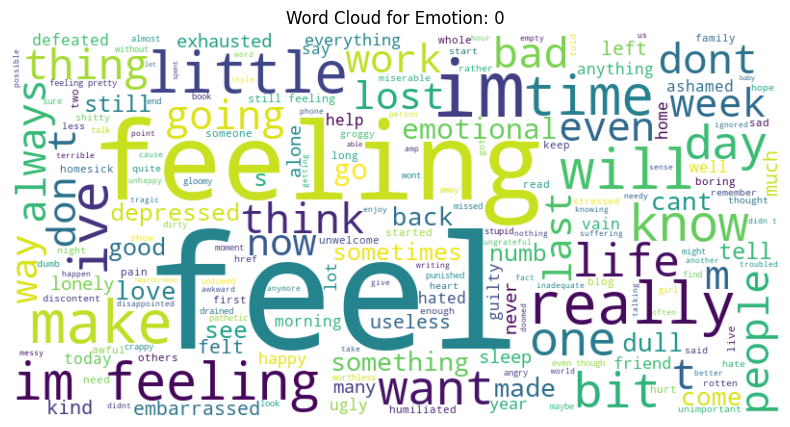

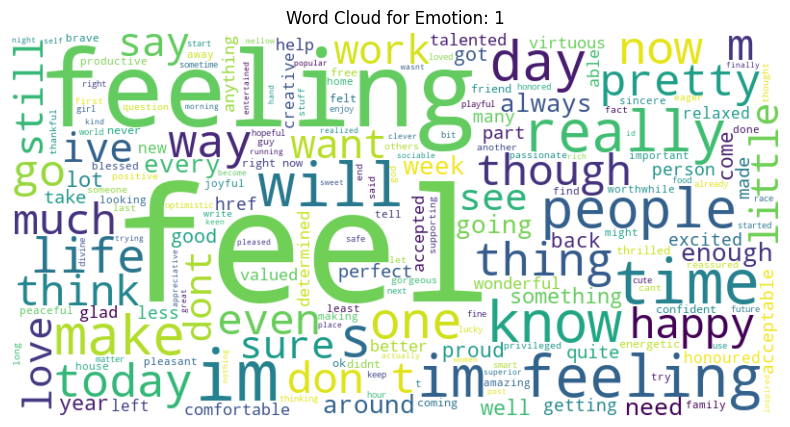

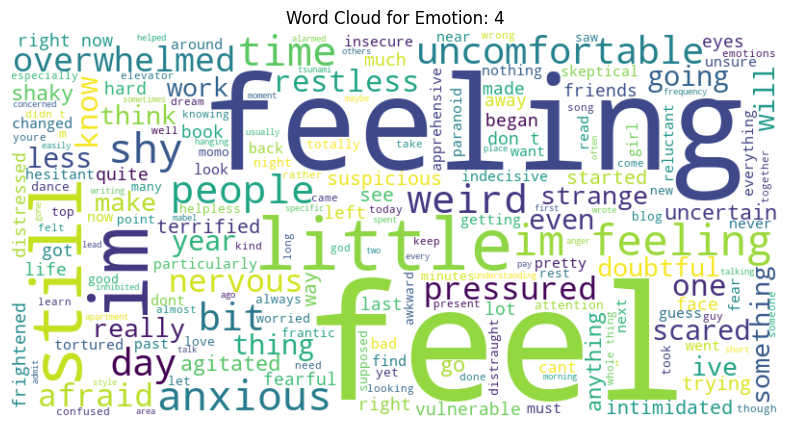

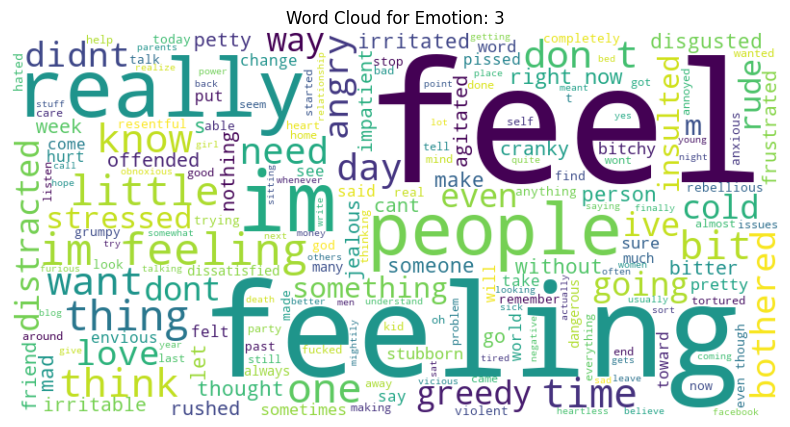

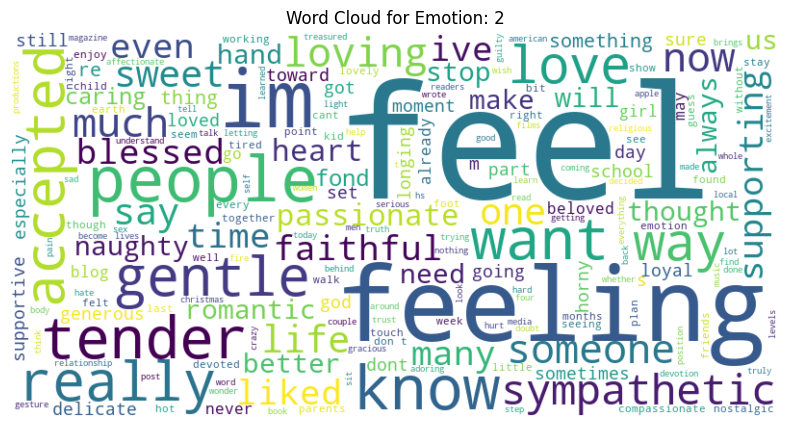

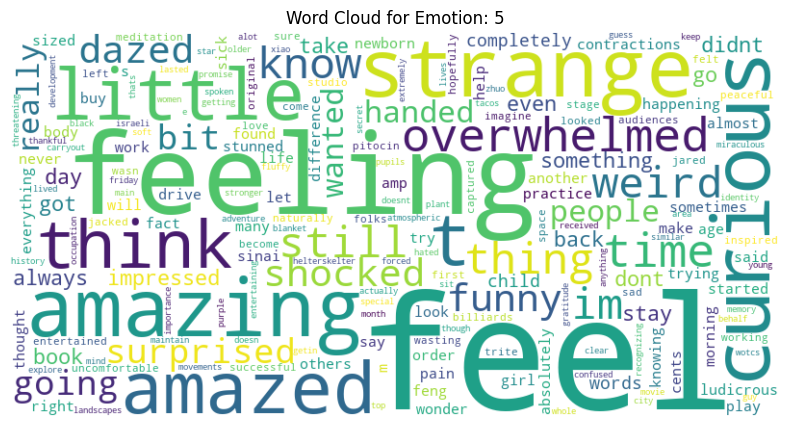

In [17]:
# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

label_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

for label in df_results['Actual'].unique():  # Loops through each emotion
    texts = df_results[df_results['Actual'] == label]['Text']  # Gets all texts for the emotion
    combined_text = " ".join(texts)  # Joins all texts into one large string

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)  # Creates word cloud
    plt.figure(figsize=(10, 5))  # Set the figure size
    plt.imshow(wordcloud, interpolation='bilinear')  # Show the word cloud
    plt.axis("off")  # Remove axes
    plt.title(f"Word Cloud for Emotion: {label}")  # Set the title for the word cloud
    plt.show()  # Display the word cloud


In [18]:
import pickle

# Save vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save model
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

